In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Lendo e separando os dados de treino

In [4]:
# Leitura dos dados
train_df = pd.read_csv('meds_train_alunos_sinteticos.csv')

In [5]:
# Seleção das colunas de sinais (RSSI) e delays conforme especificação
features = ['rssi_1_1', 'rssi_1_2', 'rssi_1_3',
            'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
            'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
            'delay_1', 'delay_2', 'delay_3']

X = train_df[features]
y = train_df[['lat', 'lon']]

In [6]:
# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

Aplicando modelo Random Florest

In [7]:
# Aplicação do Random Florest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
pred_rf = rf.predict(X_val)

Calculando variáveis dos erros

In [8]:
# Função para calcular a distância entre dois pontos geográficos
def haversine(lat1, lon1, lat2, lon2):
    """
    Calcula a distância em metros entre dois pontos definidos por latitude e longitude.
    """
    # Conversão de graus para radianos
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Diferenças
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Fórmula de Haversine
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Raio da Terra (m)
    r = 6371000
    return c * r

In [9]:
# Calcular os erros (distância em metros)
errors_rf = []
for i in range(len(y_val)):
    actual_lat, actual_lon = y_val.iloc[i]
    pred_lat, pred_lon = pred_rf[i]
    error = haversine(actual_lat, actual_lon, pred_lat, pred_lon)
    errors_rf.append(error)

In [ ]:
# Métricas do Random Forest
print("Random Forest - Erro Médio:", np.mean(errors_rf))
print("Random Forest - Erro Mediana:", np.median(errors_rf))
print("Random Forest - Erro Mínimo:", np.min(errors_rf))
print("Random Forest - Erro Máximo:", np.max(errors_rf))
print("Random Forest - Erro Desvio Padrão:", np.std(errors_rf))s

Random Forest - Erro Médio: 6.715109752041421
Random Forest - Mediana: 4.355839997173516
Random Forest - Erro Mínimo: 1.5785137053000116e-09
Random Forest - Erro Máximo: 123.08462628007625
Random Forest - Desvio Padrão: 9.234310639120714


Plotando gráficos

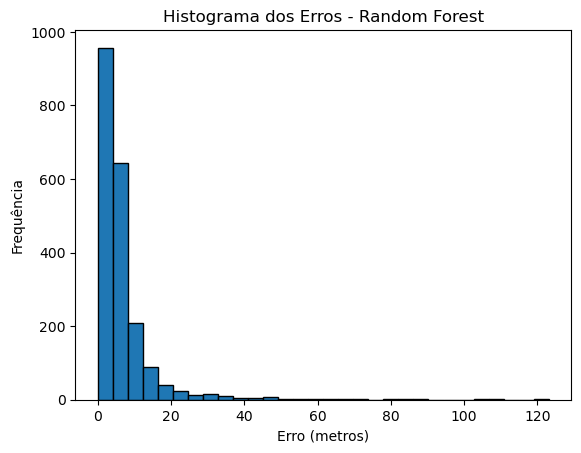

In [11]:
# Histograma dos erros
plt.figure()
plt.hist(errors_rf, bins=30, edgecolor='black')
plt.title("Histograma dos Erros - Random Forest")
plt.xlabel("Erro (metros)")
plt.ylabel("Frequência")
plt.show()

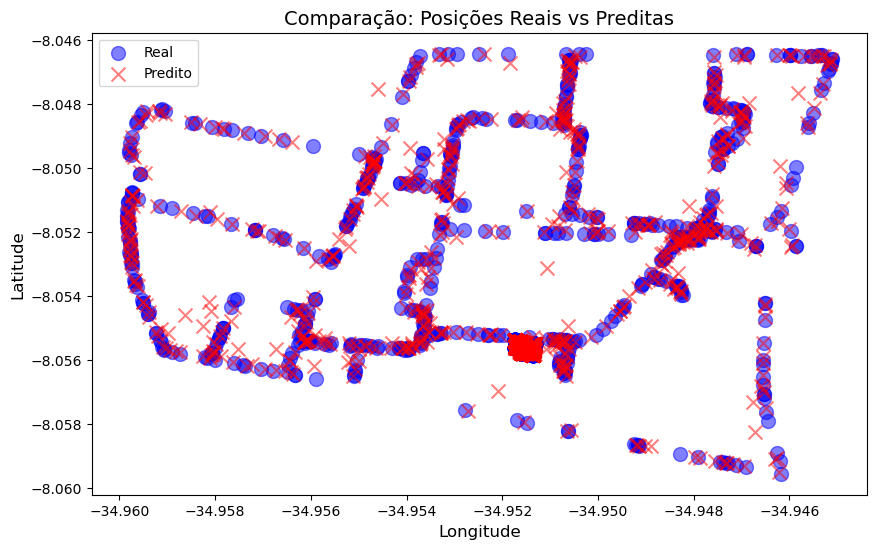

In [12]:
# Plotting
plt.figure(figsize=(10, 6))
# Scatter plot para as posições reais
plt.scatter(y_val['lon'], y_val['lat'], color='blue', label='Real', alpha=0.5, s=100, marker='o')
# Scatter plot para as posições preditas
plt.scatter(pred_rf[:, 1], pred_rf[:, 0], color='red', label='Predito', alpha=0.5, s=100, marker='x')

# Adicionando rótulos e título
plt.title('Comparação: Posições Reais vs Preditas', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Inserindo legenda
plt.legend(loc='upper left')

# Exibir gráfico
plt.show()

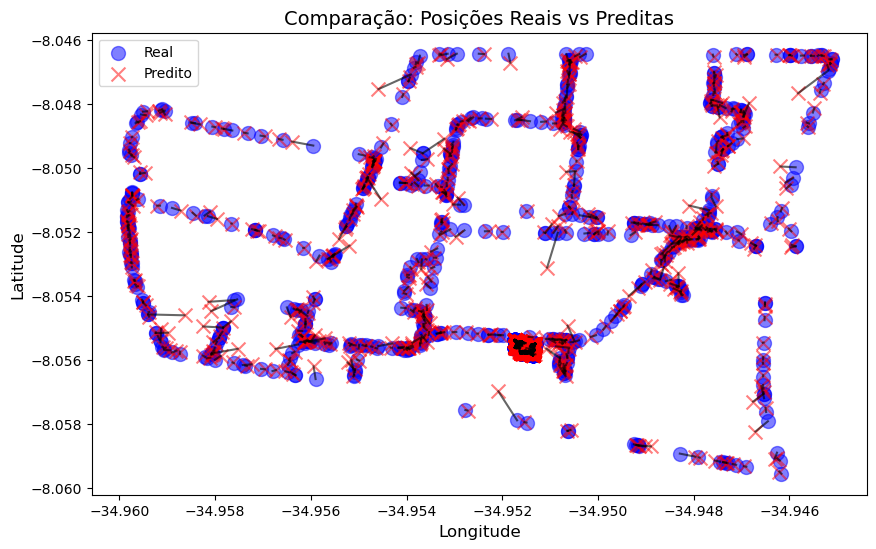

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
# Scatter plot para as posições reais
plt.scatter(y_val['lon'], y_val['lat'], color='blue', label='Real', alpha=0.5, s=100, marker='o')
# Scatter plot para as posições preditas
plt.scatter(pred_rf[:, 1], pred_rf[:, 0], color='red', label='Predito', alpha=0.5, s=100, marker='x')

# Adiciona linhas conectando os pontos reais e previstos, com cor mais escura
for i in range(len(y_val)):
    plt.plot([y_val['lon'].iloc[i], pred_rf[i, 1]], [y_val['lat'].iloc[i], pred_rf[i, 0]], color='black', alpha=0.6)

# Adicionando rótulos e título
plt.title('Comparação: Posições Reais vs Preditas', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Inserindo legenda
plt.legend(loc='upper left')

# Exibir gráfico
plt.show()

C:\Users\baferreira\AppData\Local\Temp\ipykernel_23880\1405783231.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


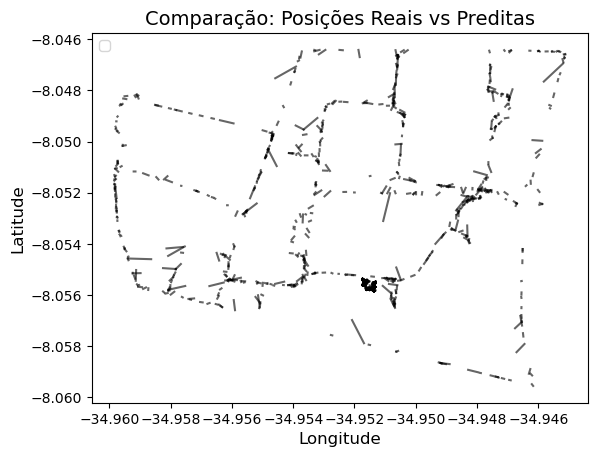

In [14]:
# Inserindo linhas conectando os pontos reais e previstos, com cor mais escura
for i in range(len(y_val)):
    plt.plot([y_val['lon'].iloc[i], pred_rf[i, 1]], [y_val['lat'].iloc[i], pred_rf[i, 0]], color='black', alpha=0.6)

# Adicionando rótulos e título
plt.title('Comparação: Posições Reais vs Preditas', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Inserindo legenda
plt.legend(loc='upper left')

# Exibir gráfico
plt.show()

Plotando gráfico e salvando resultado dos dados de teste

In [15]:
# Leitura dos dados
test_df = pd.read_csv('meds_test_alunos.csv')

In [16]:
# Previsões para o conjunto de teste
X_test = test_df[features]
pred_test = rf.predict(X_test)

In [17]:
# Criação do DataFrame de submissão
submit_df = pd.DataFrame({
    'ponto_id': test_df['ponto_id'],
    'lat': pred_test[:, 0],
    'lon': pred_test[:, 1]
})

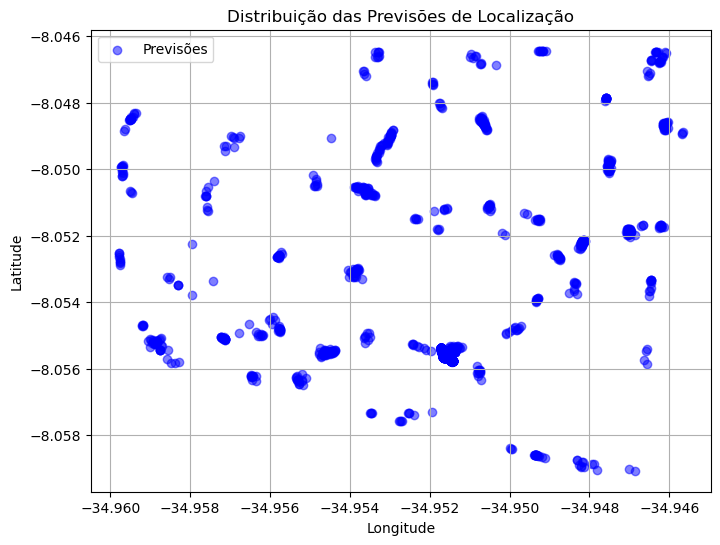

In [18]:
# Gráfico das Previsões de Localização
plt.figure(figsize=(8, 6))
plt.scatter(submit_df["lon"], submit_df["lat"], alpha=0.5, label="Previsões", color="blue")

# Personalizando o gráfico
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribuição das Previsões de Localização")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()

In [19]:
# Salvando o arquivo de submissão
submit_df.to_csv("Resultados_Random_Florest_dados_sinteticos.csv", index=False)
print("Arquivo de submissão gerado: Resultados_Random_Florest_Final_dados_sinteticos.csv")

Arquivo de submissão gerado: Resultados_Random_Florest_Final_dados_sinteticos.csv
